# 6-axis Serial Robotic Arm

<div>
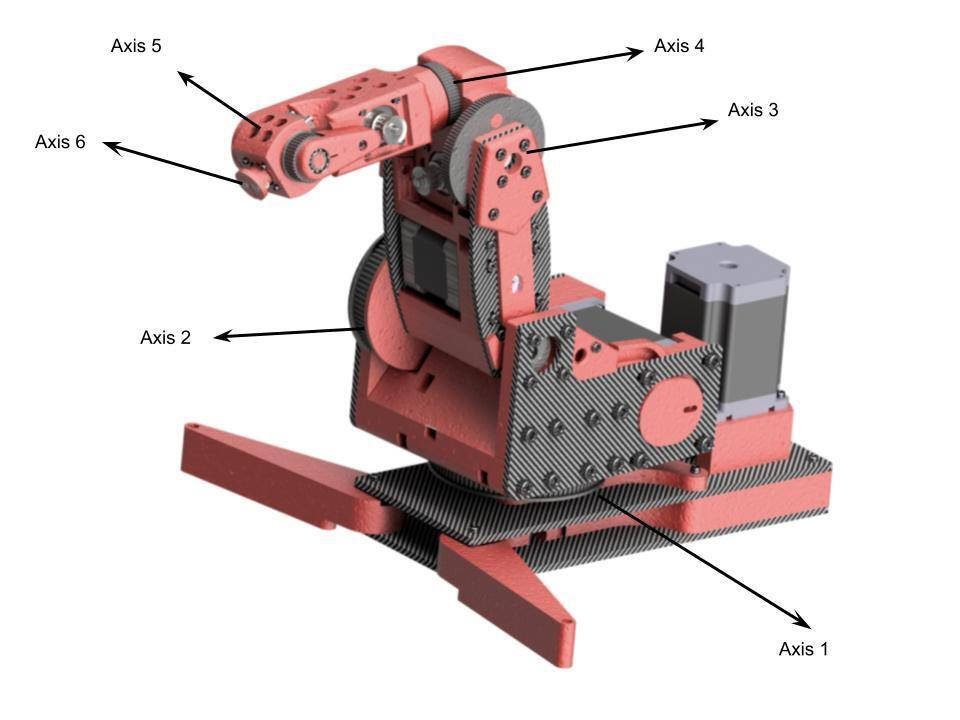
</div>

In this session, we will be working with the robotic arm pictured above. It has six degrees of freedom and is thus able to generate arbitrary end-effector positions and orientations within its reachable space.

## Kinematics

In order to describe the kinematics of this robotic arm, we will need to use the Denavit-Hartenberg conventions. To more easily visualize the different links on the robot, we can use this simplified diagram:
<div>
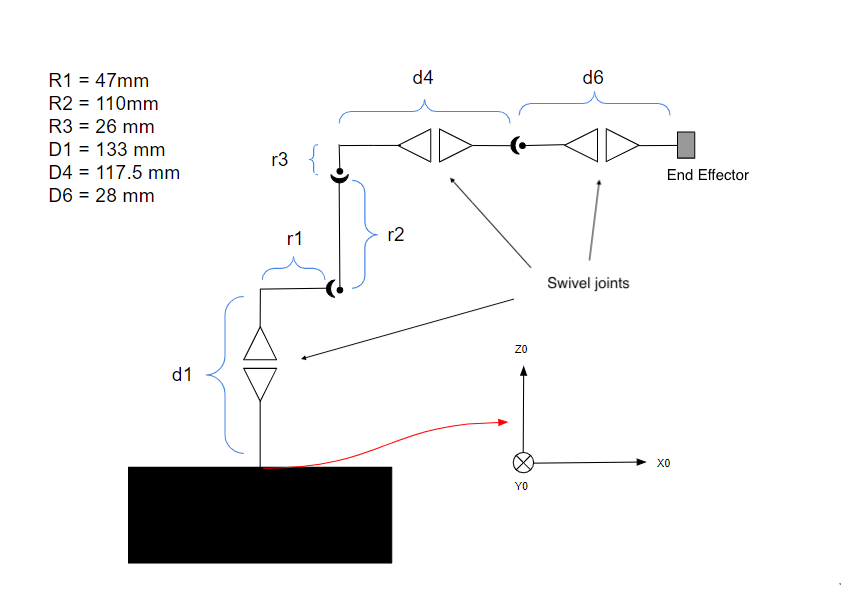
</div>    
This figure illustrates the home position of the robot, when the axes are all commanded at $0^{\circ}$.  Note that axis 2 has a $-90^{\circ}$ offset from whatever angle is commanded, so at the home position, it's angle is actually $-90^{\circ}$.  The $\otimes$ symbol on the base frame indicates that the $y_0$ axis goes into the page.

The joints indicated by the two triangles are actually swivel joints (such as on the base of the robot), where the axis of rotation lies along the points of the triangles. These joints can swivel a full $360^{\circ}$. Axis 1 is such a joint, and allows the robot to swivel around its base to face any direction. Axis 4 is a swivelling wrist, while axis 6 is the swivel joint at the end effector. The other joints indicated by the point and crescent-shape are the same type of rotational joint seen in the previous class.

# Task

The code below computes the forward kinematics of this robotic arm, applying the DH conventions.
1. Read through the code to work out how it computes the kinematics
2. From the diagram above, see if you can match where the six coordinate frames are given the DH parameter table
3. Run the code and check that when the angles are all zero, the first three components of the output from the kinematics describe the end effector position.
4. Experiment with the code to find at least two different sets of joint angles where the end effector is 10 mm above the ground (i.e. $z_0 = 10$).
5. <b>Extension:</b> The last three components of the output describe the orientation of the end effector in degrees, using <i>Euler Angles</i>.  It basically tells us how to rotate the base frame to get to the end effector, by rotating about the Z-axis by the first angle, the Y-axis by the second angle and then the Z-axis again by the 3rd angle.  Check that the orientation is also correct.

list down what joint angles you found that lead to the end effector being 10 mm above the ground.


In [4]:
import numpy as np
import sympy as sp

# Kinematic Parameters

# Lengths in millimeters
r1 = 47.0
r2 = 110.0
r3 = 26.0
d1 = 133.0
d3 = 0.0
d4 = 117.50
d6 = 28.0

# Symbolic Angles
t1s, t2s, t3s, t4s, t5s, t6s = sp.symbols("theta_1, theta_2, theta_3, theta_4, theta_5, theta_6")

# Rotation matrices
def RotZ(t):
    return sp.Matrix([[sp.cos(t),-sp.sin(t),0,0],[sp.sin(t), sp.cos(t),0,0],[0,0,1,0],[0,0,0,1]])

def TranZ(d):
    temp = sp.eye(4)
    temp[2,3] = d
    return temp

def TranX(r):
    temp = sp.eye(4)
    temp[0,3] = r
    return temp

def RotX(alpha):
    return sp.Matrix([[1,0,0,0],[0, sp.cos(alpha),-sp.sin(alpha),0],[0,sp.sin(alpha), sp.cos(alpha),0],[0,0,0,1]])

# Returns the homogeneous matrix by applying the DH conventions
def DHMatrix(params):
    [theta,d,r,alpha] = params
    return RotZ(theta)*TranZ(d)*TranX(r)*RotX(alpha)

# Denavit-Hartenberg Parameters
DH_table = [[        t1s, d1, r1, -sp.pi/2],
            [t2s-sp.pi/2,  0, r2,        0],
            [        t3s, d3, r3, -sp.pi/2], 
            [        t4s, d4,  0,  sp.pi/2], 
            [        t5s,  0,  0, -sp.pi/2], 
            [        t6s, d6,  0,        0]]

#DH_table = [[t1s,d1,r1,-sp.pi/2],[t2s-sp.pi/2,0,r2,0],[t3s, d3, r3, -sp.pi/2], 
 #                    [t4s, d4,0,sp.pi/2], [t5s, 0, 0, -sp.pi/2], [t6s, d6, 0, 0]]

# Symbolic Transformation Matrix
Transform = np.eye(4)
for i in range(0,len(DH_table)):
    Transform = Transform @ DHMatrix(DH_table[i])
    
Orientation = sp.zeros(3,1)

# Compute the end-effector Euler angles
Orientation[0] = sp.atan2(sp.sqrt(Transform[2, 0]*Transform[2, 0] + Transform[2, 1]*Transform[2, 1]),Transform[2, 2])
Orientation[1] = sp.atan2(Transform[1, 2]/sp.sin(Orientation[0]),Transform[0, 2]/sp.sin(Orientation[0]))
Orientation[2] = sp.atan2(Transform[2, 1]/sp.sin(Orientation[0]),-Transform[2, 0]/sp.sin(Orientation[0]))
    
# Numerical value for the end effector position
t = [t1s, t2s, t3s, t4s, t5s, t6s]
kinematics_fn = sp.lambdify(t, sp.Matrix([Transform[0:3,3], 180/sp.pi*Orientation]))
kinematics = lambda t: np.squeeze(kinematics_fn(*(t*np.pi/180)))

In [3]:
# Example Computation

end_effector_pose = kinematics(np.array([0,0,0,0,0,0]))
print(f"Position of end effector: {end_effector_pose[0:3]}")
print(f"Orientation of end effector: {end_effector_pose[3:6]}")

Position of end effector: [192.5   0.  269. ]
Orientation of end effector: [  90.    0. -180.]
